# Assignment 2

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

Loaded image shape: (2254, 1999, 3) dtype: uint8


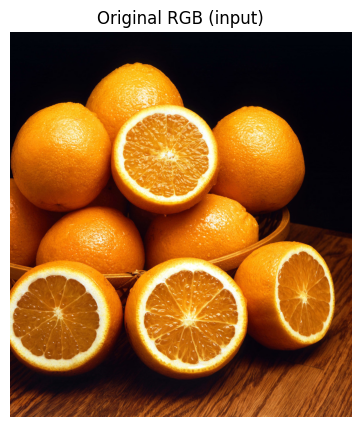

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import io, base64, sys

try:
    import cv2
    _HAS_CV2 = True
except Exception:
    _HAS_CV2 = False
    print("cv2 not available — conversions using cv2 will be skipped.", file=sys.stderr)

def show(img, title=None, cmap=None):
    plt.figure(figsize=(6,5))
    if img.ndim == 2:
        plt.imshow(img, cmap=cmap or 'gray', vmin=0, vmax=255)
    else:
        plt.imshow(img.astype(np.uint8))
    plt.axis('off')
    if title:
        plt.title(title)
    plt.show()

def to_uint8(img):
    """Convert float image (any range) to uint8 0..255 for display (linear scaling)."""
    mi, ma = np.min(img), np.max(img)
    if ma == mi:
        return np.clip(img, 0, 255).astype(np.uint8)
    out = (img - mi) / (ma - mi) * 255.0
    return np.clip(out, 0, 255).astype(np.uint8)


IMAGE_PATH = "/content/Ambersweet_oranges.jpg"
IMAGE_PATH2 = "/content/Apple.54.21.jpeg"


def load_image(path, b64):
    if path:
        try:
            img = Image.open(path).convert("RGB")
            return np.array(img)
        except Exception as e:
            print("Failed to load from path:", e, file=sys.stderr)
    if b64 and b64.strip():
        try:
            data = base64.b64decode(b64)
            img = Image.open(io.BytesIO(data)).convert("RGB")
            return np.array(img)
        except Exception as e:
            print("Failed to load from base64:", e, file=sys.stderr)
    raise RuntimeError("No image loaded. Provide IMAGE_PATH or BASE64_STRING.")

try:
    rgb = load_image(IMAGE_PATH, BASE64_STRING)
except Exception as e:

    print("Warning: No input image found. Using a synthetic gradient test image for demonstration.", file=sys.stderr)
    H, W = 256, 384
    x = np.tile(np.linspace(0,255,W,dtype=np.uint8), (H,1))
    y = np.tile(np.linspace(0,255,H,dtype=np.uint8), (W,1)).T
    rgb = np.stack([x, y, np.full_like(x, 128)], axis=2)

print("Loaded image shape:", rgb.shape, "dtype:", rgb.dtype)
show(rgb, title="Original RGB (input)")

## Part A

1. Grayscale Histogram - load you image and then write a function <code>gray_histogram</code>. Details below :
```
Requirements:
Function Signature : gray_histogram(gray_img)
1. Input is a non-normalized grayscale image (values 0–255)
2. Use pure NumPy loops
3. No OpenCV histogram functions allowed
```
Then plot using matplotlib.


2. RGB Histogram - do the same for an RGB image, final result should look like the one attached in the lecture slides. But, ONLY using Numpy. Plot using matplotlib. ( If you get 1st part, this is very easy )


In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

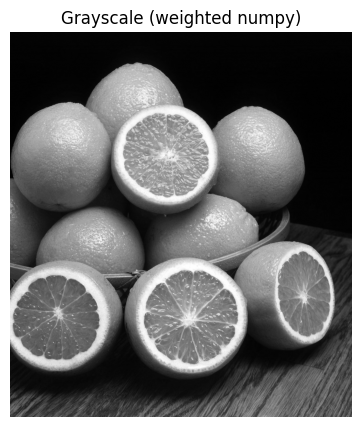

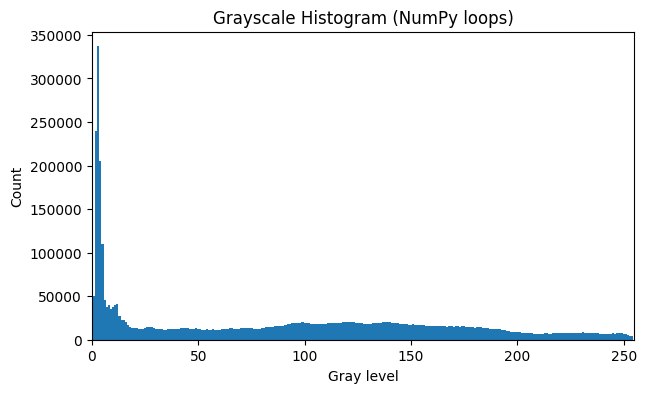

In [6]:

def rgb_to_gray_weighted(rgb_img):
    """Simple weighted sum grayscale (0-255), using standard luminance weights.
       Input: rgb_img uint8 or float in 0..255, shape (H,W,3). Returns float grayscale (H,W)."""
    rgb_f = rgb_img.astype(np.float32)

    w = np.array([0.2989, 0.5870, 0.1140], dtype=np.float32)
    gray = rgb_f[..., 0]*w[0] + rgb_f[..., 1]*w[1] + rgb_f[..., 2]*w[2]

    return gray

gray = rgb_to_gray_weighted(rgb)
show(to_uint8(gray), title="Grayscale (weighted numpy)")

def gray_histogram(gray_img):

    if gray_img.dtype != np.uint8:

        arr = np.clip(gray_img, 0, 255).astype(np.uint8)
    else:
        arr = gray_img
    hist = np.zeros(256, dtype=np.int64)

    flat = arr.ravel()
    for val in flat:
        hist[int(val)] += 1
    return hist

hist_gray = gray_histogram(gray)

plt.figure(figsize=(7,4))
plt.bar(np.arange(256), hist_gray, width=1.0, edgecolor='none')
plt.title("Grayscale Histogram (NumPy loops)")
plt.xlabel("Gray level")
plt.ylabel("Count")
plt.xlim([0,255])
plt.show()

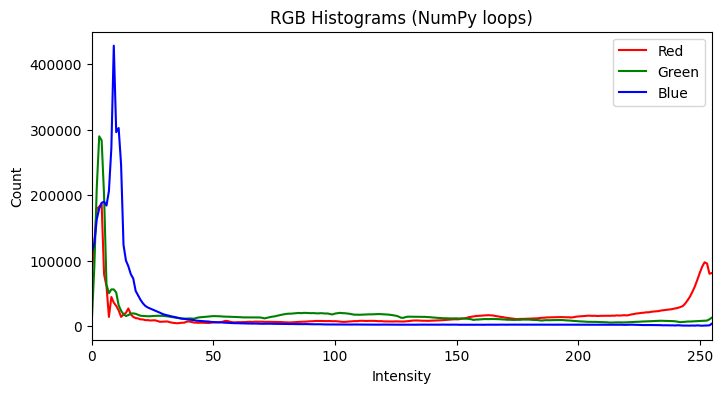

In [7]:

def rgb_histogram(rgb_img):

    if rgb_img.dtype != np.uint8:
        img = np.clip(rgb_img, 0, 255).astype(np.uint8)
    else:
        img = rgb_img
    H, W, C = img.shape
    assert C == 3, "Expected RGB image"
    hist_r = np.zeros(256, dtype=np.int64)
    hist_g = np.zeros(256, dtype=np.int64)
    hist_b = np.zeros(256, dtype=np.int64)

    for i in range(H):

        row = img[i]
        for j in range(W):
            r, g, b = row[j]
            hist_r[int(r)] += 1
            hist_g[int(g)] += 1
            hist_b[int(b)] += 1
    return hist_r, hist_g, hist_b

hist_r, hist_g, hist_b = rgb_histogram(rgb)

plt.figure(figsize=(8,4))
plt.plot(hist_r, color='r', label='Red')
plt.plot(hist_g, color='g', label='Green')
plt.plot(hist_b, color='b', label='Blue')
plt.title("RGB Histograms (NumPy loops)")
plt.xlabel("Intensity")
plt.ylabel("Count")
plt.xlim([0,255])
plt.legend()
plt.show()

## Part B

#### RGB to HSV ( only Numpy ofc )
Write a function <code>rgb_to_hsv</code> that takes a 0-255 ( not normalised ) RGB image and returns an HSV image ( also not normalised ).

**Note :** Research for the formulas, maybe ask some AI to explain you the algo and formulas ( NOT to give you the code, seriously youre not gonna learn anything if you do that )

The output should be in a format that is compatible with OpenCV cvtColor. Read the documentation to find out any Hue scaling etc.
Finally, use your function and test it by using cv2.cvtColor to convert your function output into RGB again and display it. Your image will appear the same after reconversion into RGB.

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

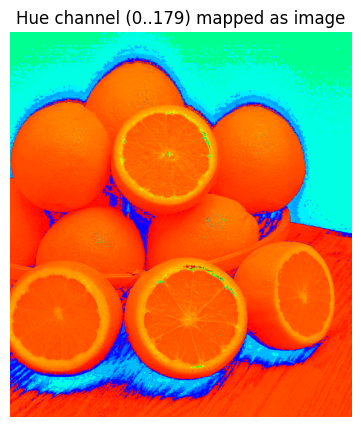

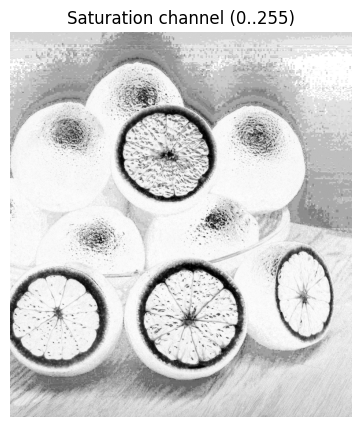

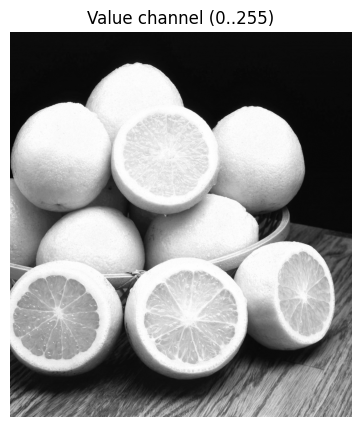

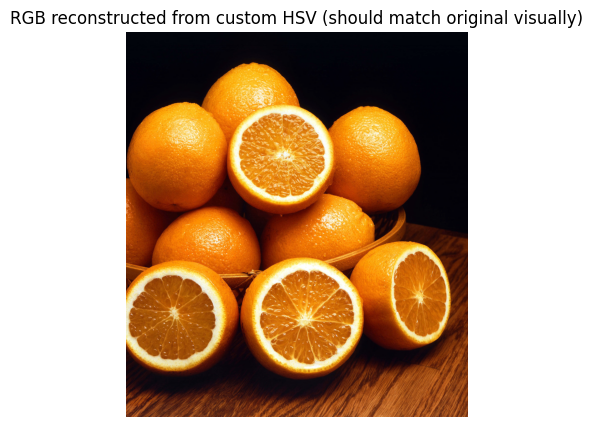

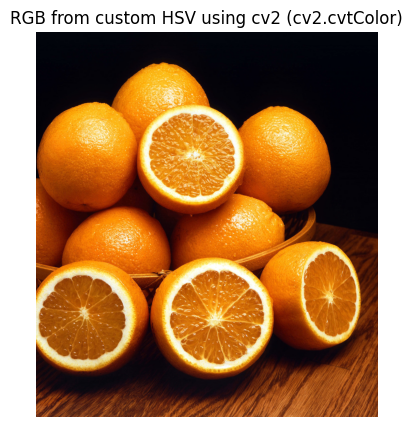

Max absolute difference between original RGB and reconverted via custom->cv2: 9


In [8]:

def rgb_to_hsv_numpy(rgb_img):
    """
    Input: rgb_img with values in 0..255 (uint8 or float)
    Output: hsv_img in OpenCV 8-bit HSV format: H:[0..179], S:[0..255], V:[0..255]
    All NumPy vectorized operations.
    """
    img = rgb_img.astype(np.float32) / 255.0  # normalize to [0,1]
    r = img[...,0]
    g = img[...,1]
    b = img[...,2]
    maxc = np.maximum(np.maximum(r,g), b)
    minc = np.minimum(np.minimum(r,g), b)
    delta = maxc - minc


    h = np.zeros_like(maxc)
    mask = delta > 1e-8


    mask_r = mask & (maxc == r)
    h[mask_r] = (60 * ( (g[mask_r] - b[mask_r]) / delta[mask_r] ) ) % 360


    mask_g = mask & (maxc == g)
    h[mask_g] = (60 * ( (b[mask_g] - r[mask_g]) / delta[mask_g] ) + 120) % 360


    mask_b = mask & (maxc == b)
    h[mask_b] = (60 * ( (r[mask_b] - g[mask_b]) / delta[mask_b] ) + 240) % 360

    s = np.zeros_like(maxc)
    nonzero_max = maxc > 1e-8
    s[nonzero_max] = delta[nonzero_max] / maxc[nonzero_max]
    v = maxc

    H = (h / 2.0)
    S = s * 255.0
    V = v * 255.0

    hsv = np.stack([H, S, V], axis=-1).astype(np.uint8)
    return hsv


hsv_custom = rgb_to_hsv_numpy(rgb)

show(hsv_custom[...,0], title="Hue channel (0..179) mapped as image", cmap='hsv')
show(hsv_custom[...,1], title="Saturation channel (0..255)")
show(hsv_custom[...,2], title="Value channel (0..255)")


def hsv_to_rgb_numpy(hsv_img):
    """
    Input: hsv_img in OpenCV 8-bit format (H:0..179, S:0..255, V:0..255)
    Output: rgb_img in 0..255 uint8
    We'll invert the formulas.
    """
    H = hsv_img[...,0].astype(np.float32) * 2.0
    S = hsv_img[...,1].astype(np.float32) / 255.0
    V = hsv_img[...,2].astype(np.float32) / 255.0

    C = V * S
    H_prime = H / 60.0
    X = C * (1 - np.abs((H_prime % 2) - 1))
    m = V - C

    r = np.zeros_like(H)
    g = np.zeros_like(H)
    b = np.zeros_like(H)

    # region masks
    conds = [
        (H_prime >= 0) & (H_prime < 1),
        (H_prime >= 1) & (H_prime < 2),
        (H_prime >= 2) & (H_prime < 3),
        (H_prime >= 3) & (H_prime < 4),
        (H_prime >= 4) & (H_prime < 5),
        (H_prime >= 5) & (H_prime < 6),
    ]

    # Assign temporary (R',G',B')
    r[conds[0]] = C[conds[0]]; g[conds[0]] = X[conds[0]]; b[conds[0]] = 0
    r[conds[1]] = X[conds[1]]; g[conds[1]] = C[conds[1]]; b[conds[1]] = 0
    r[conds[2]] = 0; g[conds[2]] = C[conds[2]]; b[conds[2]] = X[conds[2]]
    r[conds[3]] = 0; g[conds[3]] = X[conds[3]]; b[conds[3]] = C[conds[3]]
    r[conds[4]] = X[conds[4]]; g[conds[4]] = 0; b[conds[4]] = C[conds[4]]
    r[conds[5]] = C[conds[5]]; g[conds[5]] = 0; b[conds[5]] = X[conds[5]]

    r = (r + m) * 255.0
    g = (g + m) * 255.0
    b = (b + m) * 255.0

    rgb = np.stack([r,g,b], axis=-1)
    rgb = np.clip(rgb, 0, 255).astype(np.uint8)
    return rgb


rgb_from_custom_hsv = hsv_to_rgb_numpy(hsv_custom)
show(rgb_from_custom_hsv, title="RGB reconstructed from custom HSV (should match original visually)")


if _HAS_CV2:

    hsv_cv2 = cv2.cvtColor(rgb, cv2.COLOR_RGB2HSV)

    rgb_back_cv2 = cv2.cvtColor(hsv_custom, cv2.COLOR_HSV2RGB)
    show(rgb_back_cv2, title="RGB from custom HSV using cv2 (cv2.cvtColor)")


    diff = np.abs(rgb_back_cv2.astype(int) - rgb.astype(int))
    print("Max absolute difference between original RGB and reconverted via custom->cv2:", diff.max())


## Part C

####Create 2 filters.
1. Give them any name of your choice ( I look forward to receiveing some hilarious names in submissions )
2. Clearly state what all you are doing in the filter. Like any saturation boost, etc. ( Be creative, think about stuff like adding a blue layer or making the image look foggy )
3. Suggest what kind of images is your filter good for ( maybe beach images, or rainforest etc. )
4. Comment your code showing where you implemented what part of your filter
5. The filters should be in form of functions that take 0-255 RGB image and return 0-255 RGB image.
6. Give them an appropriate input according to your filter design, and display the original and filtered image ( Be sure to choose the image such that the effect of filter makes clear difference, preferably improvement in the image ). You can embed in 2 new images ( or even more if your filter is worthy bragging about, I dont mind, but display the original and outputs side by side )

**IMPORTANT FILTER DESIGN NOTES :**

The filter must include at least two color modifications, such as:
1. contrast adjustment
2. brightness shift
3. saturation change
4. gamma correction
5. hue rotation
6. vibrance boost
7. custom color tint
8. split-toning (different color for shadows & highlights)
9. channel mixing

Implement using NumPy + cv2 only.

Write a small note (2–3 lines) explaining:
1. why you chose those modifications
2. why they suit the image

In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

In [9]:
# Filter 1: "SunshinePop" — increase warmth, boost saturation, add contrast and slight vignette
def filter_sunshinepop(img_rgb, contrast=1.15, brightness=10, sat_boost=1.25, warm_gain=1.1):

    img = img_rgb.astype(np.float32)
    H, W, _ = img.shape

    hsv = rgb_to_hsv_numpy(img)
    Hch = hsv[...,0].astype(np.uint8)
    Sch = hsv[...,1].astype(np.float32)
    Vch = hsv[...,2].astype(np.float32)
    Sch = Sch * sat_boost
    Sch = np.clip(Sch, 0, 255)
    hsv2 = np.stack([Hch, Sch.astype(np.uint8), Vch.astype(np.uint8)], axis=-1)
    img_sat = hsv_to_rgb_numpy(hsv2).astype(np.float32)

    img_contr = (img_sat - 128.0) * contrast + 128.0 + brightness

    img_contr[...,0] = img_contr[...,0] * warm_gain
    img_contr[...,2] = img_contr[...,2] * (2.0 - warm_gain)  # if warm_gain >1, reduce blue

    Y, X = np.ogrid[:H, :W]
    cy, cx = H/2, W/2
    max_dist = np.sqrt(cx*cx + cy*cy)
    dist = np.sqrt((X - cx)**2 + (Y - cy)**2)
    vignette = 1.0 - 0.5 * (dist / max_dist)**2
    vignette = vignette[..., np.newaxis]
    img_vign = img_contr * vignette

    out = np.clip(img_vign, 0, 255).astype(np.uint8)
    return out

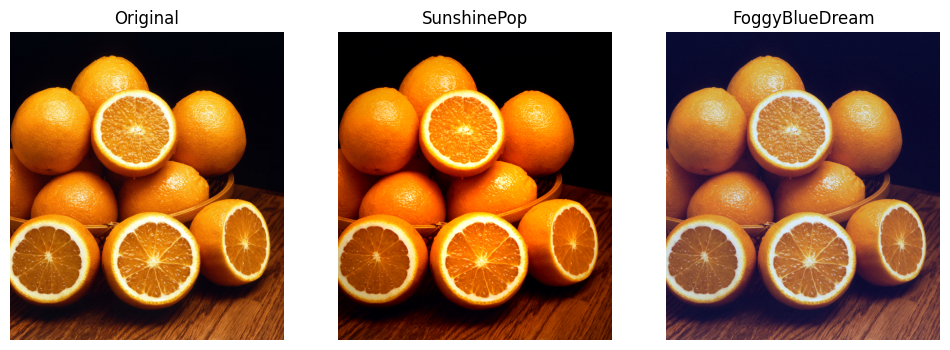

Filter notes:

SunshinePop: increases saturation, contrast and warmth; adds a soft vignette — good for portraits, golden-hour photos, and images needing more pop.
FoggyBlueDream: reduces contrast slightly, selectively desaturates shadows, adds a blue tint and grain — good for moody, foggy landscapes, seascapes, or cinematic looks.


In [10]:
# Filter 2: "FoggyBlueDream" — reduce contrast, add bluish tint, lower saturation selectively, add grain
def filter_foggybluedream(img_rgb, contrast=0.9, brightness=-5, blue_tint=0.12, desat_shadow=0.85, grain_amount=0.02):
    """
    Steps:
    - Convert to HSV, slightly reduce saturation in shadows, keep highlights
    - Apply bluish tint via channel mixing
    - Apply contrast and brightness
    - Add subtle grain/noise
    """
    img = img_rgb.astype(np.float32)
    H, W, _ = img.shape

    hsv = rgb_to_hsv_numpy(img)
    Hch = hsv[...,0]; Sch = hsv[...,1].astype(np.float32); Vch = hsv[...,2].astype(np.float32)

    Vnorm = Vch / 255.0

    weight = (1 - Vnorm)
    Sch = Sch * (1 - weight * (1 - desat_shadow))
    Sch = np.clip(Sch, 0, 255)
    hsv2 = np.stack([Hch.astype(np.uint8), Sch.astype(np.uint8), Vch.astype(np.uint8)], axis=-1)
    img_desat = hsv_to_rgb_numpy(hsv2).astype(np.float32)


    img_cb = (img_desat - 128.0) * contrast + 128.0 + brightness


    img_cb[...,0] = img_cb[...,0] * (1 - blue_tint*0.5)
    img_cb[...,2] = img_cb[...,2] + 255 * blue_tint

    img_cb = np.clip(img_cb, 0, 255)


    noise = np.random.randn(H, W, 1).astype(np.float32) * (255 * grain_amount)
    img_noisy = img_cb + noise
    out = np.clip(img_noisy, 0, 255).astype(np.uint8)
    return out

out1 = filter_sunshinepop(rgb)
out2 = filter_foggybluedream(rgb)

plt.figure(figsize=(12,5))
plt.subplot(1,3,1); plt.imshow(rgb.astype(np.uint8)); plt.title("Original"); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(out1); plt.title("SunshinePop"); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(out2); plt.title("FoggyBlueDream"); plt.axis('off')
plt.show()

print("Filter notes:\n")
print("SunshinePop: increases saturation, contrast and warmth; adds a soft vignette — good for portraits, golden-hour photos, and images needing more pop.")
print("FoggyBlueDream: reduces contrast slightly, selectively desaturates shadows, adds a blue tint and grain — good for moody, foggy landscapes, seascapes, or cinematic looks.")


## Part D

#### White Balance Function
Write a function <code>white_patch_balance(img_rgb)</code> that takes a 0-255 RGB image and then returns a White Patch Method Balanced 0-255 RBG image. Use Numpy only to keep track of the brightest pixel and then scale the entire image with the factor you find. Display the original and output image.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

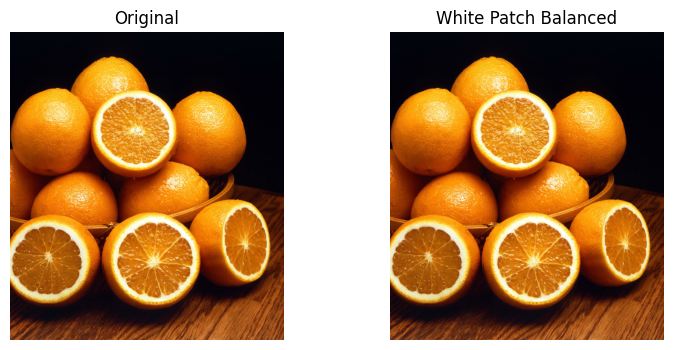

In [11]:

def white_patch_balance(img_rgb):

    img = img_rgb.astype(np.float32)

    max_r = np.max(img[...,0])
    max_g = np.max(img[...,1])
    max_b = np.max(img[...,2])

    max_r = max_r if max_r > 1e-8 else 1.0
    max_g = max_g if max_g > 1e-8 else 1.0
    max_b = max_b if max_b > 1e-8 else 1.0
    sr = 255.0 / max_r
    sg = 255.0 / max_g
    sb = 255.0 / max_b
    out = np.empty_like(img)
    out[...,0] = img[...,0] * sr
    out[...,1] = img[...,1] * sg
    out[...,2] = img[...,2] * sb
    out = np.clip(out, 0, 255).astype(np.uint8)
    return out

wb = white_patch_balance(rgb)
plt.figure(figsize=(9,4))
plt.subplot(1,2,1); plt.imshow(rgb.astype(np.uint8)); plt.title("Original"); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(wb); plt.title("White Patch Balanced"); plt.axis('off')
plt.show()

## Bonus - Part E

#### Create a White Balance Slider

Here's a link to a video of how my phone camera's White Balance feature works.
https://photos.app.goo.gl/zArkv5UcWiRV96JA9

Now, you will need to create a function <code>white_balance(img_rgb, value)</code>

It takes the img_rgb ( 0-255 RGB image ) and value ( 0-1 decimal number ).
1. value = 0 outputs the coldest version of the image
2. value = 0.5 is the original image itself
3. value = 1 is the warmest version of the image

The output should be the processed 0-255 RGB image. Display the original and processed image.

Try to make it look as good as possible. I dont expect you guys to copy my phone and create industry level outputs, but work hard and experiment. You can include even failed tries or what you felt was not satisfactory ( that will show how much effort you put in )

In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

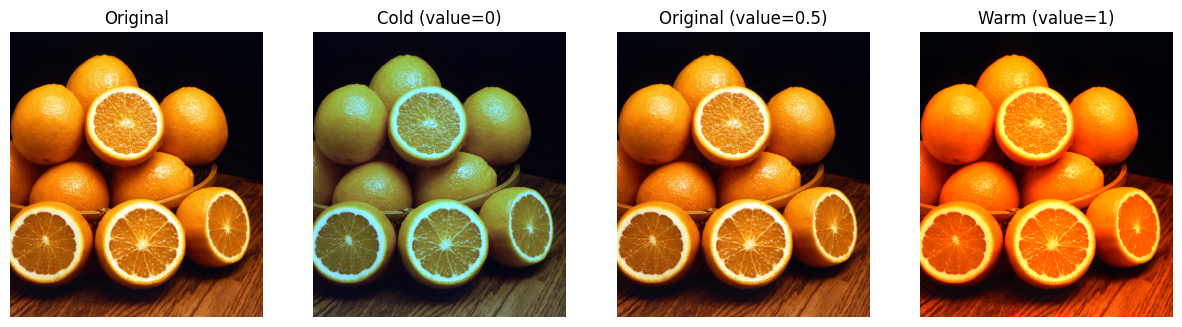

In [12]:

def white_balance(img_rgb, value):

    assert 0.0 <= value <= 1.0,
    img = img_rgb.astype(np.float32)
    delta = value - 0.5
    k = 0.8
    R_gain = 1.0 + k * delta
    B_gain = 1.0 - k * delta

    s_factor = 0.25
    sat_mult = 1.0 + s_factor * delta

    hsv = rgb_to_hsv_numpy(img)
    Hch = hsv[...,0].astype(np.uint8)
    Sch = hsv[...,1].astype(np.float32) * sat_mult
    Vch = hsv[...,2]
    Sch = np.clip(Sch, 0, 255)
    hsv2 = np.stack([Hch, Sch.astype(np.uint8), Vch.astype(np.uint8)], axis=-1)
    img_sat = hsv_to_rgb_numpy(hsv2).astype(np.float32)

    out = img_sat.copy()
    out[...,0] = out[...,0] * R_gain
    out[...,2] = out[...,2] * B_gain

    gamma = 1.0

    if abs(gamma - 1.0) > 1e-6:
        out = 255.0 * ((out/255.0) ** (1.0/gamma))

    out = np.clip(out, 0, 255).astype(np.uint8)
    return out

wb_cold = white_balance(rgb, 0.0)
wb_orig = white_balance(rgb, 0.5)
wb_warm = white_balance(rgb, 1.0)

plt.figure(figsize=(15,5))
plt.subplot(1,4,1); plt.imshow(rgb.astype(np.uint8)); plt.title("Original"); plt.axis('off')
plt.subplot(1,4,2); plt.imshow(wb_cold); plt.title("Cold (value=0)"); plt.axis('off')
plt.subplot(1,4,3); plt.imshow(wb_orig); plt.title("Original (value=0.5)"); plt.axis('off')
plt.subplot(1,4,4); plt.imshow(wb_warm); plt.title("Warm (value=1)"); plt.axis('off')
plt.show()